# Определение перспективного тарифа для телеком компании

Задача проекта - провести анализ для телеком - компании . Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Цель - понять, какой тариф более выгоден.

Описание тарифов:  
Тариф «Смарт»  
1.Ежемесячная плата: 550 рублей  
2.Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика  
3.Стоимость услуг сверх тарифного пакета:
+ минута разговора: 3 рубля
+ сообщение: 3 рубля
+ 1 Гб интернет-трафика: 200 рублей  

Тариф «Ультра»  
1.Ежемесячная плата: 1950 рублей  
2.Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика  
3.Стоимость услуг сверх тарифного пакета:  
+ минута разговора: 1 рубль  
+ сообщение: 1 рубль  
+ 1 Гб интернет-трафика: 150 рублей  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar
import math
import seaborn as sns
from scipy import stats as st
import warnings
warnings.filterwarnings("ignore")


## 1. Изучение общей информации

In [3]:
# Оценим данные в предоставленных таблицах
display(calls.head())
print('Calls - Информация о звонках')
display(internet.head())
print('internet - Информация об интернет-соединениях')
display(messages.head())
print('messages - Информация о сообщениях')
display(tariffs.head())
print('tariffs - Информация о тарифах')
display(users.head())
print('Users - Информация о пользователях')

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Calls - Информация о звонках


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


internet - Информация об интернет-соединениях


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


messages - Информация о сообщениях


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


tariffs - Информация о тарифах


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Users - Информация о пользователях


In [4]:
print('Calls')
calls.info()
print('---------------------------------------')
print('internet')
internet.info()
print('---------------------------------------')
print('message')
messages.info()
print('---------------------------------------')
print('tariffs')
tariffs.info()
print('---------------------------------------')
print('users')
users.info()


Calls
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
---------------------------------------
internet
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
---------------------------------------
message

In [5]:
display(calls.describe())
display(internet.describe())
display(messages.describe())
display(tariffs.describe())
display(users.describe())

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


In [6]:
# Проверим наличие дубликатов
display(calls.duplicated().sum())
display(internet.duplicated().sum())
display(messages.duplicated().sum())
display(users.duplicated().sum())

0

0

0

0

### Вывод

Предварительное изучение данных показывает необходимость проведения следующих мероприятий:  
+ Привести все данные, содержащие даты к корректному типу
+ В таблице `internet` удалить дублирующий столбец `Unnamed: 0`
+ Возможно объединение таблиц `messages`, `internet`, `calls`  в одну, по клиенту.


## 2. Подготовка данных

In [7]:
# Приведем все даты к верному типу данных
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')


В таблицах `calls` и `internet`, есть нулевые значения длительности разговора и объема используемого трафика. Проведем анализ и примем решение, заполнять нулевые значения, либо они являются корректными и должны остаться в неизменном виде.  
Посчитаем, по какому количеству записей есть нулевые значения длительности разговора и трафика.

In [8]:
calls.query('duration == 0').count()


id           39613
call_date    39613
duration     39613
user_id      39613
dtype: int64

In [9]:
internet.query('mb_used == 0').count()

Unnamed: 0      19598
id              19598
mb_used         19598
session_date    19598
user_id         19598
dtype: int64

Получаем 20% и 13% выборки для длительности разговора и трафика соответственно.  
Проверим, какое количество пользователей имеет такие значения, возможно имеет место ошибка выгрузки данных по части пользователей.

In [10]:
len(calls.query('duration == 0')['user_id'].unique())

492

In [11]:
len(internet.query('mb_used == 0')['user_id'].unique())

494

Видим, что практически все пользователи имеют нулевые сессии. Т.о. можем сделать вывод, что это реальные сессии, когда длительность разговора, либо объем потребленного трафика = 0 (допустим, неотвеченный вызов, либо неудачная сессия подключения к интернету), потому что подавляющее большинство пользователей имеет как нулевые, так и ненулевые сессии.  
Т.к. у нас нет задачи заполнить все нулевые значения выборки, оставим их нулевыми, для сохранения адекватности данных.  
Теоретически, вне рамок этой задачи нулевые значения, можно было заполнить, например, медианными значениями для каждого пользователя, для длительности разговора и объема трафика соответственно.


In [12]:
# Удалим дублирующийся столбец
del internet['Unnamed: 0']

In [13]:
# Проверим
print('Calls')
calls.info()
print('---------------------------------------')
print('internet')
internet.info()
print('---------------------------------------')
print('message')
messages.info()
print('---------------------------------------')
print('tariffs')
tariffs.info()
print('---------------------------------------')
print('users')
users.info()


Calls
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB
---------------------------------------
internet
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), o

Соединим данные из таблиц `calls`, `mssage`, `internet` в один датафрейм, сгруппировав по пользователю.  Для этого предварительно укрупним даты, округлив их месяца, т.к. все они расположены в рамках одного года. Далее , соединим все датафреймы в один.

In [14]:
# Преобразуем столбцы с датой в каждой таблице, оставим только номер месяца

calls['call_date'] = pd.DatetimeIndex(calls['call_date']).month
messages['message_date'] = pd.DatetimeIndex(messages['message_date']).month
internet['session_date'] = pd.DatetimeIndex(internet['session_date']).month

In [15]:
# Переименуем столбцы с датой
calls = calls.rename(columns = {'call_date': 'month'})
internet = internet.rename(columns = {'session_date': 'month'})
messages = messages.rename(columns = {'message_date': 'month'})
display(calls.head())
print('Calls - Информация о звонках')
display(internet.head())
print('internet - Информация об интернет-соединениях')
display(messages.head())
print('messages - Информация о сообщениях')


,id,month,duration,user_id
0,1000_0,7,0.00,1000
1,1000_1,8,0.00,1000
2,1000_2,6,2.85,1000
3,1000_3,9,13.80,1000
4,1000_4,12,5.18,1000


Calls - Информация о звонках


,id,mb_used,month,user_id
0,1000_0,112.95,11,1000
1,1000_1,1052.81,9,1000
2,1000_2,1197.26,6,1000
3,1000_3,550.27,8,1000
4,1000_4,302.56,9,1000


internet - Информация об интернет-соединениях


,id,month,user_id
0,1000_0,6,1000
1,1000_1,10,1000
2,1000_2,8,1000
3,1000_3,6,1000
4,1000_4,12,1000


messages - Информация о сообщениях


In [16]:
# Округлим значения использованых клиентами минут и Мб до ближайшего целого числа, в соответствии с политикой компании, для последующего расчета выручки по каждому клиенту.
def get_ceil_call(row):
    if row['duration'] == row['duration']:
        row['duration'] = math.ceil(row['duration'])
    return row

def get_ceil_mb(row):
    if row['mb_used'] == row['mb_used']:
        row['mb_used'] = math.ceil(row['mb_used'])
    return row

In [17]:
calls = calls.apply(get_ceil_call, axis = 1)
internet = internet.apply(get_ceil_mb, axis = 1)

In [18]:
#Проверяем
display(calls.head())
print('Calls - Информация о звонках')
display(internet.head())
print('internet - Информация об интернет-соединениях')


,id,month,duration,user_id
0,1000_0,7,0,1000
1,1000_1,8,0,1000
2,1000_2,6,3,1000
3,1000_3,9,14,1000
4,1000_4,12,6,1000


Calls - Информация о звонках


,id,mb_used,month,user_id
0,1000_0,113,11,1000
1,1000_1,1053,9,1000
2,1000_2,1198,6,1000
3,1000_3,551,8,1000
4,1000_4,303,9,1000


internet - Информация об интернет-соединениях


In [19]:
# Сгруппируем каждую из таблиц по пользователю
calls = calls.pivot_table(index = ['user_id', 'month'], values = 'duration', aggfunc = ['count', 'sum'])
internet = internet.pivot_table(index = ['user_id', 'month'], values = 'mb_used', aggfunc = 'sum')
messages = messages.pivot_table(index = ['user_id', 'month'], values = 'id', aggfunc = 'count')


display(calls.head(10))
display(internet.head(10))
display(messages.head(10))

count      sum
              duration duration
user_id month                  
1000    5           22      159
        6           43      172
        7           47      340
        8           52      408
        9           58      466
        10          57      350
        11          43      338
        12          46      333
1001    11          59      430
        12          63      414

mb_used
user_id month         
1000    5         2256
        6        23257
        7        14016
        8        14070
        9        14581
        10       14717
        11       14768
        12        9827
1001    11       18452
        12       14053

id
user_id month    
1000    5      22
        6      60
        7      75
        8      81
        9      57
        10     73
        11     58
        12     70
1002    6       4
        7      11

In [20]:
# Объединим данные по звонкам, сообщениям и интернету
all = calls.merge(messages, on = ['user_id', 'month'], how='outer')
all = all.merge(internet, on = ['user_id', 'month'], how='outer')
# Переименуем столбцы
all = all.rename(columns = {
    ('count', 'duration'): 'call_count', 
    ('sum', 'duration'): 'call_duration', 
    'id': 'messages_count'
})

In [21]:
display(all.head(20))

call_count  call_duration  messages_count  mb_used
user_id month                                                    
1000    5            22.0          159.0            22.0   2256.0
        6            43.0          172.0            60.0  23257.0
        7            47.0          340.0            75.0  14016.0
        8            52.0          408.0            81.0  14070.0
        9            58.0          466.0            57.0  14581.0
        10           57.0          350.0            73.0  14717.0
        11           43.0          338.0            58.0  14768.0
        12           46.0          333.0            70.0   9827.0
1001    11           59.0          430.0             NaN  18452.0
        12           63.0          414.0             NaN  14053.0
1002    6            15.0          117.0             4.0  10871.0
        7            26.0          214.0            11.0  17601.0
        8            42.0          289.0            13.0  20347.0
        9            36.0          206.0             4.0  16712.0
        10           33.0          212.0            10.0  13905.0
        11           32.0          243.0            16.0  18610.0
        12           33.0          236.0            12.0  18137.0
1003    8            55.0          380.0            37.0   8571.0
        9           134.0          961.0            91.0  12479.0
        10          108.0          855.0            83.0  14779.0

Для каждого пользователя получили данные:
+ Количество сделанных звонков и израсходованных минут разговора по месяцам;
+ Количество отправленных сообщений по месяцам;
+ Количество израсходованного трафика по месяцам.
    

Добавим в таблицу информацию о выручке для каждого клиента.

In [22]:
# Преобразуем эту сводную таблицу в обычный датафрейм
all_df = all.reset_index()
display(all_df)

,user_id,month,call_count,call_duration,messages_count,mb_used
0,1000,5,22.0,159.0,22.0,2256.0
1,1000,6,43.0,172.0,60.0,23257.0
2,1000,7,47.0,340.0,75.0,14016.0
3,1000,8,52.0,408.0,81.0,14070.0
4,1000,9,58.0,466.0,57.0,14581.0
...,...,...,...,...,...,...
3209,1489,9,NaN,NaN,32.0,17232.0
3210,1489,10,NaN,NaN,21.0,19588.0
3211,1489,11,NaN,NaN,20.0,17516.0
3212,1489,12,NaN,NaN,35.0,17341.0


In [23]:
#Создадим отдельную таблицу с тарифными планами, городом для каждого пользователя
user_tarif = users.loc[:, ['user_id', 'tariff', 'city']]
display(user_tarif.head())

,user_id,tariff,city
0,1000,ultra,Краснодар
1,1001,smart,Москва
2,1002,smart,Стерлитамак
3,1003,ultra,Москва
4,1004,ultra,Новокузнецк


In [24]:
# Объединим с данными по тарифным планам
all_tariff = all_df.merge(user_tarif, on = 'user_id', how='outer')

In [25]:
display(all_tariff.tail(50))

,user_id,month,call_count,call_duration,messages_count,mb_used,tariff,city
3166,1497,11.0,64.0,371.0,14.0,14174.0,smart,Челябинск
3167,1497,12.0,71.0,545.0,17.0,19940.0,smart,Челябинск
3168,1498,7.0,23.0,175.0,20.0,7486.0,smart,Владикавказ
3169,1498,8.0,57.0,400.0,62.0,24270.0,smart,Владикавказ
3170,1498,9.0,59.0,471.0,44.0,22166.0,smart,Владикавказ
3171,1498,10.0,41.0,247.0,42.0,20604.0,smart,Владикавказ
3172,1499,9.0,9.0,70.0,11.0,1848.0,smart,Пермь
3173,1499,10.0,68.0,449.0,48.0,17809.0,smart,Пермь
3174,1499,11.0,74.0,612.0,59.0,17984.0,smart,Пермь
3175,1499,12.0,69.0,492.0,66.0,13077.0,smart,Пермь


Видим, что после объединения образовались пустые значения у 40 клиентов по тем столбцам, информация по данным клиентам в которых отсутствовала.  
Учитывая, что отсутствие использования минут/сообщений/трафика в исходных данных обозначается нулями, примем NaN за ошибки выгрузки данных (неполная выгрузка по некоторым клиентам, которые не пользовались услугами) и заполним пустые значения нулями. 

In [26]:
all_tariff = all_tariff.fillna(0)

In [27]:
# Проверяем
display(all_tariff.tail(50))

,user_id,month,call_count,call_duration,messages_count,mb_used,tariff,city
3166,1497,11.0,64.0,371.0,14.0,14174.0,smart,Челябинск
3167,1497,12.0,71.0,545.0,17.0,19940.0,smart,Челябинск
3168,1498,7.0,23.0,175.0,20.0,7486.0,smart,Владикавказ
3169,1498,8.0,57.0,400.0,62.0,24270.0,smart,Владикавказ
3170,1498,9.0,59.0,471.0,44.0,22166.0,smart,Владикавказ
3171,1498,10.0,41.0,247.0,42.0,20604.0,smart,Владикавказ
3172,1499,9.0,9.0,70.0,11.0,1848.0,smart,Пермь
3173,1499,10.0,68.0,449.0,48.0,17809.0,smart,Пермь
3174,1499,11.0,74.0,612.0,59.0,17984.0,smart,Пермь
3175,1499,12.0,69.0,492.0,66.0,13077.0,smart,Пермь


Добавим в таблицу столбец с выручкой по каждому клиенту за каждый месяц

In [28]:
def get_revenue(row, tariff = tariffs, revenue = 0):
    for ind, item in tariff.iterrows():
        if row['tariff'] == item['tariff_name']:
            revenue_call = (row['call_duration'] - item['minutes_included']) * item['rub_per_minute']
            if revenue_call > 0:
                revenue = revenue + revenue_call
            revenue_msg = (row['messages_count'] - item['messages_included']) * item['rub_per_message']
            if revenue_msg > 0:
                revenue = revenue + revenue_msg
            revenue_int = (row['mb_used'] - item['mb_per_month_included']) * item['rub_per_gb'] / 1024
            if revenue_int > 0:
                revenue = revenue + revenue_int
            return revenue + item['rub_monthly_fee']
            

In [29]:
all_tariff['revenue'] = all_tariff.apply(get_revenue, axis = 1)

In [30]:
display(all_tariff.head(20))

,user_id,month,call_count,call_duration,messages_count,mb_used,tariff,city,revenue
0,1000,5.0,22.0,159.0,22.0,2256.0,ultra,Краснодар,1950.000000
1,1000,6.0,43.0,172.0,60.0,23257.0,ultra,Краснодар,1950.000000
2,1000,7.0,47.0,340.0,75.0,14016.0,ultra,Краснодар,1950.000000
3,1000,8.0,52.0,408.0,81.0,14070.0,ultra,Краснодар,1950.000000
4,1000,9.0,58.0,466.0,57.0,14581.0,ultra,Краснодар,1950.000000
5,1000,10.0,57.0,350.0,73.0,14717.0,ultra,Краснодар,1950.000000
6,1000,11.0,43.0,338.0,58.0,14768.0,ultra,Краснодар,1950.000000
7,1000,12.0,46.0,333.0,70.0,9827.0,ultra,Краснодар,1950.000000
8,1001,11.0,59.0,430.0,0.0,18452.0,smart,Москва,1153.906250
9,1001,12.0,63.0,414.0,0.0,14053.0,smart,Москва,550.000000


In [31]:
#Отобразим для наглядности в виде сводной таблицы
all_tariff.pivot_table(index = ['user_id', 'month'], values = 'revenue')

revenue
user_id month             
1000    5.0    1950.000000
        6.0    1950.000000
        7.0    1950.000000
        8.0    1950.000000
        9.0    1950.000000
...                    ...
1498    10.0   1574.218750
1499    9.0     550.000000
        10.0   1028.320312
        11.0   1425.500000
        12.0    598.000000

[3216 rows x 1 columns]

Получили выручку по каждому пользователю

### Вывод

Проведена предварительная обработка данных, исправлены ошибки, перечисленные в п.1
Для каждого пользователя были получены расчетные данные:
+ Количество сделанных звонков и израсходованных минут разговора по месяцам;
+ Количество отправленных сообщений по месяцам;
+ Количество израсходованного трафика по месяцам.  

Произведен расчет помесячной выручки, генерируемой каждым пользователем.  

Далее, проанализируем полученые данные.



## 3. Анализ и описание данных

Рассчитаем сколько минут разговора, сколько сообщений и какой объем интернет-трафика используется сумарно пользователями каждого тарифа в месяц.

In [32]:
all_tariff_smart = all_tariff.query('tariff == "smart"') \
        .pivot_table(index = ['tariff', 'month'], \
                     values = ['call_duration', 'messages_count', 'mb_used', 'revenue'], \
                     aggfunc = sum)
all_tariff_ultra = all_tariff.query('tariff == "ultra"') \
        .pivot_table(index = ['tariff', 'month'], \
                     values = ['call_duration', 'messages_count', 'mb_used', 'revenue'], \
                     aggfunc = sum)

In [33]:
display(all_tariff_smart)
display(all_tariff_ultra)

call_duration    mb_used  messages_count        revenue
tariff month                                                         
smart  0.0              0.0        0.0             0.0     550.000000
       1.0           6931.0   289831.0           620.0   23886.914062
       2.0          17324.0   673461.0          1397.0   46651.585938
       3.0          30034.0  1164537.0          2453.0   86115.453125
       4.0          41119.0  1509702.0          3443.0  103302.132812
       5.0          54618.0  2231353.0          4762.0  161715.992188
       6.0          64885.0  2593622.0          5478.0  188531.070312
       7.0          82079.0  3168466.0          6784.0  234780.796875
       8.0          99045.0  3908561.0          7905.0  295747.031250
       9.0         111439.0  4244377.0          8746.0  311758.851562
       10.0        125284.0  4932898.0          9927.0  383623.640625
       11.0        137544.0  5345940.0         10768.0  405542.648438
       12.0        161275.0  6112113.0         12130.0  507479.843750

call_duration    mb_used  messages_count        revenue
tariff month                                                         
ultra  0.0              0.0        0.0             0.0    1950.000000
       1.0           3853.0   118382.0           304.0   17550.000000
       2.0           7131.0   282887.0           527.0   47353.125000
       3.0          18117.0   649423.0          1195.0   74154.345703
       4.0          25191.0   926409.0          1736.0  109748.730469
       5.0          34192.0  1298540.0          2536.0  137682.714844
       6.0          40295.0  1591148.0          3505.0  170693.115234
       7.0          49667.0  1866833.0          4536.0  191873.730469
       8.0          54653.0  2096565.0          5183.0  221613.281250
       9.0          62036.0  2210554.0          6013.0  231578.466797
       10.0         68644.0  2467856.0          7187.0  253000.927734
       11.0         72545.0  2653912.0          7476.0  278825.390625
       12.0         82400.0  3032089.0          8425.0  295548.193359

Визуализируем эти данные на графиках:

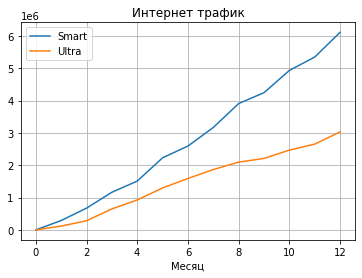

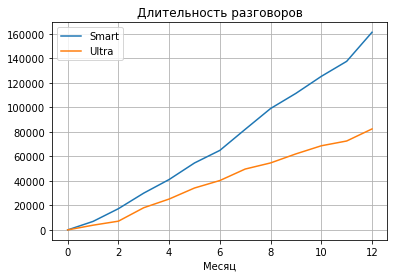

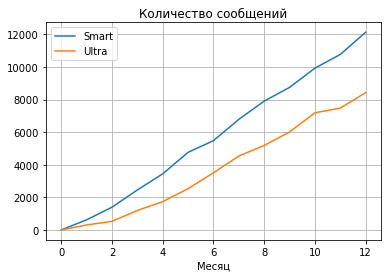

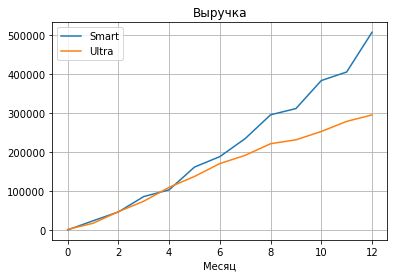

In [34]:
plt.plot(all_tariff_smart.index.get_level_values(1), all_tariff_smart['mb_used'], label = 'Smart')
plt.plot(all_tariff_ultra.index.get_level_values(1), all_tariff_ultra['mb_used'], label = "Ultra")
plt.title('Интернет трафик')
plt.xlabel("Месяц")
plt.legend()
plt.grid()
plt.show()

plt.plot(all_tariff_smart.index.get_level_values(1), all_tariff_smart['call_duration'], label = 'Smart')
plt.plot(all_tariff_ultra.index.get_level_values(1), all_tariff_ultra['call_duration'], label = "Ultra")
plt.title('Длительность разговоров')
plt.xlabel("Месяц")
plt.legend()
plt.grid()
plt.show()

plt.plot(all_tariff_smart.index.get_level_values(1), all_tariff_smart['messages_count'], label = 'Smart')
plt.plot(all_tariff_ultra.index.get_level_values(1), all_tariff_ultra['messages_count'], label = "Ultra")
plt.title('Количество сообщений')
plt.xlabel("Месяц")
plt.legend()
plt.grid()
plt.show()

plt.plot(all_tariff_smart.index.get_level_values(1), all_tariff_smart['revenue'], label = 'Smart')
plt.plot(all_tariff_ultra.index.get_level_values(1), all_tariff_ultra['revenue'], label = "Ultra")
plt.title('Выручка')
plt.xlabel("Месяц")
plt.legend()
plt.grid()
plt.show()

Можем сделать вывод, что по всем показателям динамика тарифа Smart опережающая. Т.е. по тарифу Smart , сумарно пользователи потратили больше трафика, минут и сообщений. 
Построим аналогичные графики не для общих объемов, а для средних значений по пользователям каждого из тарифных планов в разрезе месяцев года.

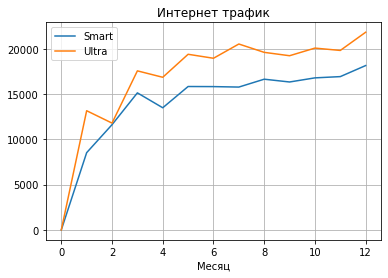

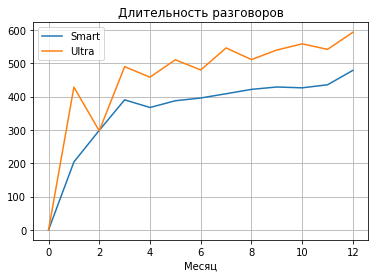

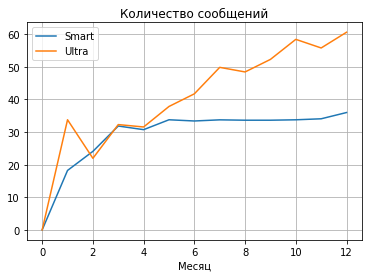

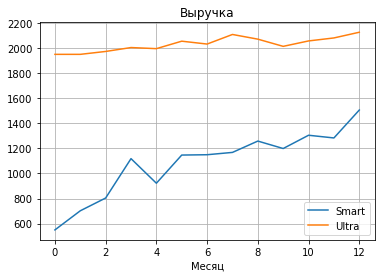

In [35]:
all_tariff_smart = all_tariff.query('tariff == "smart"') \
        .pivot_table(index = ['tariff', 'month'], \
                     values = ['call_duration', 'messages_count', 'mb_used', 'revenue'], \
                     aggfunc = np.mean)
all_tariff_ultra = all_tariff.query('tariff == "ultra"') \
        .pivot_table(index = ['tariff', 'month'], \
                     values = ['call_duration', 'messages_count', 'mb_used', 'revenue'], \
                     aggfunc = np.mean)

plt.plot(all_tariff_smart.index.get_level_values(1), all_tariff_smart['mb_used'], label = 'Smart')
plt.plot(all_tariff_ultra.index.get_level_values(1), all_tariff_ultra['mb_used'], label = "Ultra")
plt.title('Интернет трафик')
plt.xlabel("Месяц")
plt.legend()
plt.grid()
plt.show()

plt.plot(all_tariff_smart.index.get_level_values(1), all_tariff_smart['call_duration'], label = 'Smart')
plt.plot(all_tariff_ultra.index.get_level_values(1), all_tariff_ultra['call_duration'], label = "Ultra")
plt.title('Длительность разговоров')
plt.xlabel("Месяц")
plt.legend()
plt.grid()
plt.show()

plt.plot(all_tariff_smart.index.get_level_values(1), all_tariff_smart['messages_count'], label = 'Smart')
plt.plot(all_tariff_ultra.index.get_level_values(1), all_tariff_ultra['messages_count'], label = "Ultra")
plt.title('Количество сообщений')
plt.xlabel("Месяц")
plt.legend()
plt.grid()
plt.show()

plt.plot(all_tariff_smart.index.get_level_values(1), all_tariff_smart['revenue'], label = 'Smart')
plt.plot(all_tariff_ultra.index.get_level_values(1), all_tariff_ultra['revenue'], label = "Ultra")
plt.title('Выручка')
plt.xlabel("Месяц")
plt.legend()
plt.grid()
plt.show()

Видим, что по пользователям ситуация диаметрально противоположная. "Средний" пользователь тарифа Ultra, опережает своего коллегу на тарифе Smart по всем показателям: он потребляет больше интернет трафика, отправляет больше сообщений и больше использует голосовую связь, это соответственно отражается и на выручке.  
Проверим каково у нас количественное соотношение пользователей по каждому тарифному плану.

In [36]:
users.groupby('tariff')['user_id'].count()

tariff
smart    351
ultra    149
Name: user_id, dtype: int64

Количество пользователей тарифа Smart более чем в  2 раза превышает количество пользователей Ultra.  
Этим объясняется превышение объемных показателей тарифа Smart, при худших качественных показателях.  
Рассчитаем среднее, дисперсию и стандартное отклонение по каждому тарифному плану.

In [37]:
all_tariff.pivot_table(index = 'tariff', \
                        values = ['call_duration', 'mb_used', 'messages_count'], \
                        aggfunc = [np.mean, np.var, np.std]) \
                        .style.set_properties(align = 'right')

Построим гистограммы:

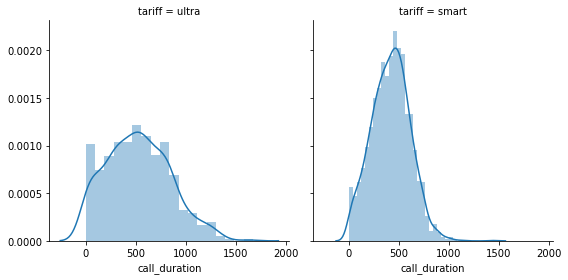

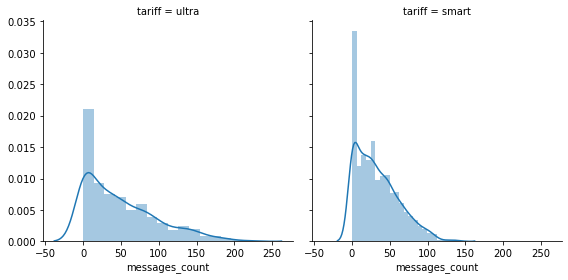

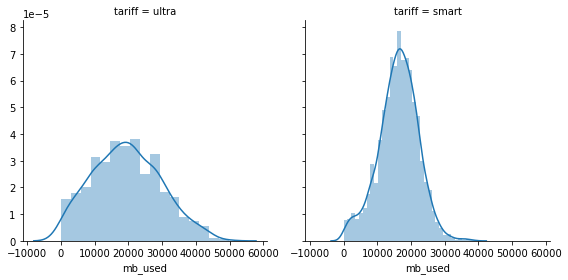

In [38]:
call = sns.FacetGrid(all_tariff, col="tariff", height = 4, gridspec_kws=None)
call.map(sns.distplot, "call_duration")

msg = sns.FacetGrid(all_tariff, col="tariff", height = 4)
msg.map(sns.distplot, "messages_count")

traffic = sns.FacetGrid(all_tariff, col="tariff", height = 4)
traffic.map(sns.distplot, "mb_used")


## Вывод

Произведен анализ полученных данных.  
Можем сделать однозначный вывод, что активность пользователей по представленым тарифным планам отличается.  
Это обусловлено сегментацией клиентов по уровню ежемесячный затрат на связь. Клиенты более доступного по цене тарифного плана показывают более низкую потребительскую активность. Они менее активно используют как голосовую связь, сообщения так и интернет.  
Пользователи же относительно дорогого тарифного плана в среднем на  30% более активны в использовании услуг связи, по всем трем исследуемым показателям.   
Произведен расчет статистических показателей и построены гистрограммы. По гистограммам сложно сделать однозначный вывод, какому закону распределеня они подчиняются. Наблюдается некоторая скошенность данных вправо, особенно  по тарифу Ultra.
Далее, от анализа количественных показателей, перейдем к анализу выручки и проверим гипотезы ее отличий в зависимости от тарифного плана.

## 4. Проверка гипотез

Проверим гипотезу о равенстве средней выручки для тарифов "Ультра" и "Смарт". Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод `scipy.stats.ttest_ind` 

In [39]:
display(all_tariff.head())

,user_id,month,call_count,call_duration,messages_count,mb_used,tariff,city,revenue
0,1000,5.0,22.0,159.0,22.0,2256.0,ultra,Краснодар,1950.0
1,1000,6.0,43.0,172.0,60.0,23257.0,ultra,Краснодар,1950.0
2,1000,7.0,47.0,340.0,75.0,14016.0,ultra,Краснодар,1950.0
3,1000,8.0,52.0,408.0,81.0,14070.0,ultra,Краснодар,1950.0
4,1000,9.0,58.0,466.0,57.0,14581.0,ultra,Краснодар,1950.0


In [40]:
revenue_ultra = all_tariff[all_tariff['tariff'] == 'ultra']['revenue']
revenue_smart = all_tariff[all_tariff['tariff'] == 'smart']['revenue']

В качестве нулевой гипотезы примем: "Средние выручки по тарифам "Смарт"  и "Ультра" равны."  
Альтернативная гипотеза, соответственно,  "Средние выручки по тарифам "Смарт" и "Ультра" отличаются."

Перед проверкой гипотез рассчитаем значения дисперсии для обеих выборок, для того, чтобы определиться с параметром `equal_var` метода.

In [41]:
all_tariff.pivot_table(index = 'tariff', values = 'revenue', aggfunc = np.var)

,revenue
tariff,
smart,620383.654857
ultra,126836.789215


Т.к. дисперсии для двух выборок значительно различаются, примем параметр `equal_var` как False, для использования собственной дисперсии для каждой савокупности.

In [42]:
alpha = 0.05
results = st.ttest_ind(revenue_ultra, revenue_smart, equal_var = False)

print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.665639404941842e-296
Отвергаем нулевую гипотезу


Полученное значение p-value говорит о том, что вероятность исполнения нулевой гипотезы ничтожна мала.

Проверим гипотезу по средней выручке пользователей из Москвы.  
Для начала визуально оценим выручки по месяцам для Москвы и прочих городов.

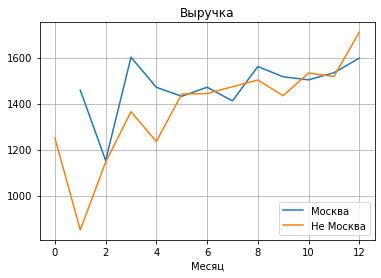

In [43]:
all_tariff_MSK = all_tariff.query('city == "Москва"') \
        .pivot_table(index = 'month', values = 'revenue', aggfunc = np.mean)
all_tariff_notMSK = all_tariff.query('city != "Москва"') \
        .pivot_table(index = 'month', values = 'revenue', aggfunc = np.mean)

plt.plot(all_tariff_MSK.index.get_level_values(0), all_tariff_MSK['revenue'], label = 'Москва')
plt.plot(all_tariff_notMSK.index.get_level_values(0), all_tariff_notMSK['revenue'], label = "Не Москва")
plt.title('Выручка')
plt.xlabel("Месяц")
plt.legend()
plt.grid()
plt.show()

Сформулируем нулевую гипотезу: "Средние выручки в Москве и других регионах равны". Альтернативная гипотеза: "Средняя выручка Москвы не равна средней выручке в других городах"

Аналогично проверке предыдущей гипотезы, рассчитаем дисперсии и определимся со значением параметра `equal_var`.

In [44]:
revenue_MSK = all_tariff[all_tariff['city'] == 'Москва']['revenue']
revenue_notMSK = all_tariff[all_tariff['city'] != 'Москва']['revenue']


In [45]:
np.var(revenue_MSK)

546347.0989109305

In [46]:
np.var(revenue_notMSK)

630195.2607344859

Т.к. значения дисперсий близки, установим equal_var = True (умолчательное значение), 

In [47]:


alpha = 0.05
results = st.ttest_ind(revenue_MSK, revenue_notMSK, equal_var = False)

print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.4517561756356935
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, вероятность получить результат, при условии верности нулевой гипотезы, всего 45%. Значит мы не можем сделать вывод о значительном различии средних значений выручки в Москве и прочих городах, т.к. эта вероятность слишком высока.

Количество пользователей из Москвы и других регионов:

In [48]:
users[users['city'] == 'Москва']['user_id'].count()

99

In [49]:
users[users['city'] != 'Москва']['user_id'].count()

401

## Вывод

Были сопоставлены средние двух совокупностей и проверены 2 гипотезы:
+ средняя выручка пользователей тарифов "Ультра" и "Смарт" различается;
+ средняя выручка пользователей из Москвы отличается от выручки пользователей из других городов.

На основании проведенного исследования можно сделать выводы, что выручка по двум тарифным планам существенно отличается. Но вместе с тем, выручка в Москве сопоставима с совокупной выручкой во всех других регионах, несмотря на то, что клиентов в Москве меньше в 4 раза, чем во всех других регионах.

## 5. Общий вывод 

Целью проводимого исследования было выяснить, какой из тарифных планов боле выгоден компании и на продвижение какого продукта следует направить рекламный бюджет.  
Исследование дает однозначный вывод, что средняя выручка на одного клиент по тарифу Ультра превышает аналогичный показатель для тарифа Смарт в среднем более чем на 30 %.  
Т.о. при условии одинаковой стоимости привлечения клиента для двух тарифных планов, предпочтение стоит отдать тарифу Ультра, т.к. это даст большую рентабельность.  
Кроме того, необходимо обратить внимание на Московский регион, где рентабельность выше среднего по стране, так, выручка по одному московскому клиенту сопоставима с выручной четырех региональных клиентов. Т.о., желательно провести дополнительное исследование по распределению рекламного бюджета между регионами, анализируя конверсию потраченных средств в количество привлеченных клиентов. Это будет одним из критериев максимизации прибыли.
В конечном итоге, вопрос о том, как распределить бюджет между двумя тарифными планами сводится к решению оптимизационной задачи.
